In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_dir ='/content/drive/MyDrive/google collllab/Monkey Breed Dataset/train'
test_dir ='/content/drive/MyDrive/google collllab/Monkey Breed Dataset/testing'

In [7]:

# Parameters
batch_size = 32
img_height = 150
img_width = 150

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and prepare test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print out the number of classes found
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Calculate steps_per_epoch ensuring it's at least 1
steps_per_epoch = max(1, train_generator.samples // batch_size)

# Train the model
history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

Found 60 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
Number of classes: 3
Epoch 1/25
1/1 [==============================] - ETA: 0s - loss: 1.1146 - accuracy: 0.2812

1/1 [==============================] - 55s 55s/step - loss: 1.1146 - accuracy: 0.2812 - val_loss: 3.8476 - val_accuracy: 0.3333
Epoch 2/25
1/1 [==============================] - 1s 992ms/step - loss: 3.3727 - accuracy: 0.4286
Epoch 3/25
1/1 [==============================] - 1s 820ms/step - loss: 1.1099 - accuracy: 0.3750
Epoch 4/25
1/1 [==============================] - 1s 791ms/step - loss: 1.2506 - accuracy: 0.2500
Epoch 5/25
1/1 [==============================] - 1s 673ms/step - loss: 1.0259 - accuracy: 0.5357
Epoch 6/25
1/1 [==============================] - 1s 838ms/step - loss: 1.0379 - accuracy: 0.3929
Epoch 7/25
1/1 [==============================] - 1s 694ms/step - loss: 1.0701 - accuracy: 0.2500
Epoch 8/25
1/1 [==============================] - 1s 595ms/step - loss: 1.0275 - accuracy: 0.4062
Epoch 9/25
1/1 [==============================] - 1s 738ms/step - loss: 0.9888 - accuracy: 0.6429
Epoch 10/25
1/1 [==============================] - 1s 1s/step - loss: 0.9337 - accuracy:

In [10]:
from sklearn.metrics import classification_report

# Predict the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)


1/1 [==============================] - 0s 293ms/step

Classification Report:
              precision    recall  f1-score   support

          m0       1.00      0.50      0.67         2
          m1       0.00      0.00      0.00         2
          m2       0.25      0.50      0.33         2

    accuracy                           0.33         6
   macro avg       0.42      0.33      0.33         6
weighted avg       0.42      0.33      0.33         6



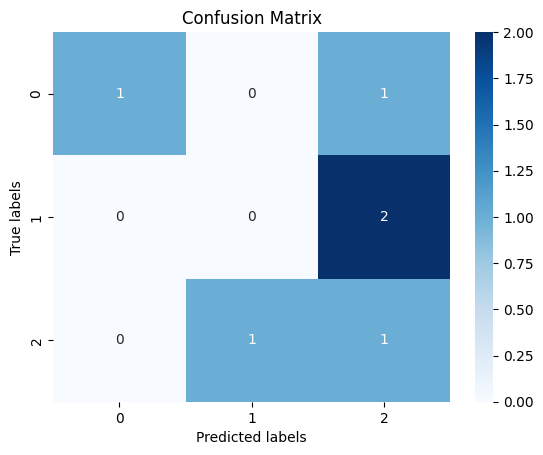


Confusion Matrix:
[[1 0 1]
 [0 0 2]
 [0 1 1]]


In [12]:

# Compute confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix


conf_mat = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
print("\nConfusion Matrix:")
print(conf_mat)



In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to your single image
image_path = '/content/drive/MyDrive/google collllab/Monkey Breed Dataset/train/m0/n1017.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
predicted_class = np.argmax(model.predict(img_array))

# Get the class label
predicted_label = list(train_generator.class_indices.keys())[predicted_class]

print("Predicted class:", predicted_label)


1/1 [==============================] - 0s 69ms/step
Predicted class: m0
